In [32]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import normalize

In [12]:
data= pd.read_csv('crime_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [14]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
df_norm = norm_func(data.iloc[:,1:])

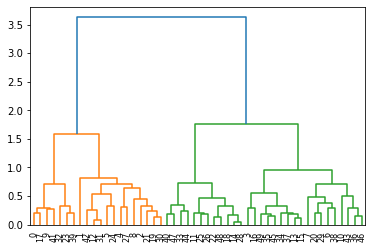

In [10]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [11]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [12]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
df_norm['h_clusterid'] = Clusters

In [14]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,3


In [ ]:
#kemeans method

In [15]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [43]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])

NameError: name 'data' is not defined

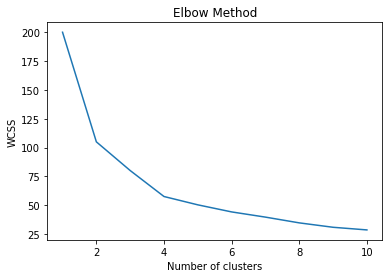

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
clusters_new = KMeans(4, random_state=12)
clusters_new.fit(scaled_data)

KMeans(n_clusters=4, random_state=12)

In [25]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [26]:
data['clusterid_new'] = clusters_new.labels_

In [30]:
clusters_new.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [31]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,10.815385,257.384615,76.000000,33.192308
2,2,5.656250,138.875000,73.875000,18.781250
3,3,13.937500,243.625000,53.750000,21.412500


In [32]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
#DB-scan

In [33]:
c_data= pd.read_csv('crime_data.csv')

In [34]:
c_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [58]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
c_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [38]:
array=c_data.values

In [39]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [41]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [42]:
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.6, min_samples=4)

In [43]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1],
      dtype=int64)

In [44]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [45]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [46]:
Clusters.head()

,Clusters
0,3
1,1
2,1
3,0
4,1


In [ ]:
#queastion no 2

In [5]:
ew_air=pd.read_excel('EastWestAirlines.xlsx', sheet_name ='data')

In [8]:
ew_air= ew_air.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [9]:
ew_air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [30]:
ew_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


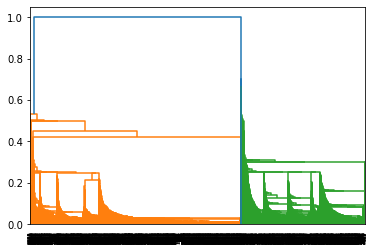

In [35]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(ew_air.iloc[:,1:])
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [36]:
hc = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage = 'single')

In [37]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [40]:
df_norm['h_clusterid'] = Clusters

In [38]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [41]:
df_norm.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.057044,0.021519,0.417916,0.003747,0.003576,0.108550,0.181349,0.026022,0.046206,0.558064,1.0
1,1,0.023712,0.039828,0.750000,0.000000,0.000000,0.311777,0.773256,0.586527,0.858491,0.310586,1.0
2,2,0.035075,0.007864,0.176471,0.006955,0.001490,0.038620,0.106301,0.007349,0.012321,0.460566,0.0
3,3,0.042708,0.000000,0.000000,0.000000,0.875000,0.250043,0.122093,0.000000,0.000000,0.265493,0.0
4,4,0.031636,0.014950,0.000000,1.000000,0.000000,0.104988,0.300388,0.054029,0.144654,0.576521,1.0
5,5,0.093917,0.044851,0.000000,0.000000,0.000000,0.272879,1.000000,1.000000,1.000000,0.165300,1.0
6,6,0.168364,0.000000,0.000000,0.000000,0.000000,0.099213,0.674419,0.417724,1.000000,0.273692,1.0
7,7,0.056678,0.106028,0.000000,0.000000,0.500000,0.186052,0.302326,0.074634,0.169811,0.812153,1.0
8,8,0.005019,0.000000,0.000000,0.000000,0.000000,0.760840,0.058140,0.020184,0.056604,0.235471,1.0


In [ ]:
#k means

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_ew_data = scaler.fit_transform(ew_air.iloc[:,1:])

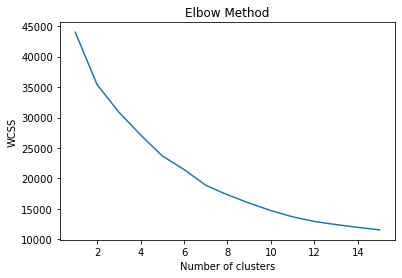

In [48]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_ew_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=42)
clusters_new.fit(scaled_ew_data)

KMeans(n_clusters=7, random_state=42)

In [51]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 2, 2])

In [53]:
ew_air['clusterid_new'] = clusters_new.labels_

In [54]:
clusters_new.cluster_centers_

array([[-1.39739148e-01, -1.06243367e-01, -5.04469731e-01,
        -9.82418871e-02, -5.85365869e-02, -4.59283998e-01,
        -3.59961117e-01, -1.39406497e-01, -1.48362274e-01,
         7.83479496e-01, -1.53021159e-01],
       [ 4.69839654e-01, -1.12402786e-01,  1.32429420e+00,
        -9.82418871e-02, -5.33067064e-02,  1.06316276e+00,
         7.95907634e-01, -7.21017876e-02, -8.17047594e-02,
         3.24476957e-01,  6.63354403e-01],
       [-3.67473217e-01, -1.39442973e-01, -5.73849414e-01,
        -9.82418871e-02, -6.27665798e-02, -5.09819738e-01,
        -5.02487867e-01, -2.08969960e-01, -2.28064197e-01,
        -9.19010385e-01, -4.71493142e-01],
       [ 1.16052271e+00,  4.36020719e-01,  1.67307550e-01,
        -9.82418871e-02, -6.27665798e-02,  6.94407196e-01,
         1.77785138e+00,  3.79919478e+00,  4.09529133e+00,
         2.76357234e-01,  8.83748240e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [56]:
ew_air.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1099.803468,59520.782824,61.928159,1.364988,1.000000,1.000826,6054.080099,8.145334,264.881916,0.810900,5736.347647,0.296449
1,1,1654.413666,120943.810711,57.163435,3.882733,1.000000,1.001847,42818.045245,19.244691,359.110803,1.063712,4788.564174,0.690674
2,2,3066.350793,36573.600276,36.246037,1.269469,1.000000,1.000000,4833.745693,6.776706,167.490696,0.508615,2220.916609,0.142660
3,3,1746.311594,190539.152174,481.405797,2.289855,1.000000,1.000000,33913.355072,28.673913,5779.057971,16.905797,4689.202899,0.797101
4,4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,6,2083.603448,118527.293103,5486.241379,2.051724,1.000000,1.000000,19386.500000,12.500000,980.724138,2.913793,3928.534483,0.551724


In [57]:
ew_air.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1099.803468,59520.782824,61.928159,1.364988,1.000000,1.000826,6054.080099,8.145334,264.881916,0.810900,5736.347647,0.296449
1,1,1654.413666,120943.810711,57.163435,3.882733,1.000000,1.001847,42818.045245,19.244691,359.110803,1.063712,4788.564174,0.690674
2,2,3066.350793,36573.600276,36.246037,1.269469,1.000000,1.000000,4833.745693,6.776706,167.490696,0.508615,2220.916609,0.142660
3,3,1746.311594,190539.152174,481.405797,2.289855,1.000000,1.000000,33913.355072,28.673913,5779.057971,16.905797,4689.202899,0.797101
4,4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,6,2083.603448,118527.293103,5486.241379,2.051724,1.000000,1.000000,19386.500000,12.500000,980.724138,2.913793,3928.534483,0.551724


In [ ]:
#db scan

In [59]:
ew_airdata=pd.read_excel('EastWestAirlines.xlsx', sheet_name ='data')

In [61]:
array=ew_airdata
array

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [62]:
ew_airdata= ew_air.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [63]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [64]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [65]:
dbscan = DBSCAN(eps=1.2, min_samples=12)
dbscan.fit(X)

DBSCAN(eps=1.2, min_samples=12)

In [66]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [68]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [69]:
pd.concat([ew_air,cl],axis=1)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0
